In [2]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv("/content/placement.csv")

In [7]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [11]:
df.shape

(100, 4)

# 0.1 Preprocess Data

In [13]:
df = df.iloc[:,1:]

#### Explanation: \\
**df** This represents the DataFrame you are working with.

**.iloc[]**  is an index-based selection method in pandas. It allows you to select rows and columns by their integer position.

**:** This indicates that you want to select all rows in the DataFrame.

**1:** This means you want to select all columns starting from the second column (since Python uses zero-based indexing).

In [15]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


# 0.2 EDA (Exploratory Data Analysis)

In [16]:
import matplotlib.pyplot as plt

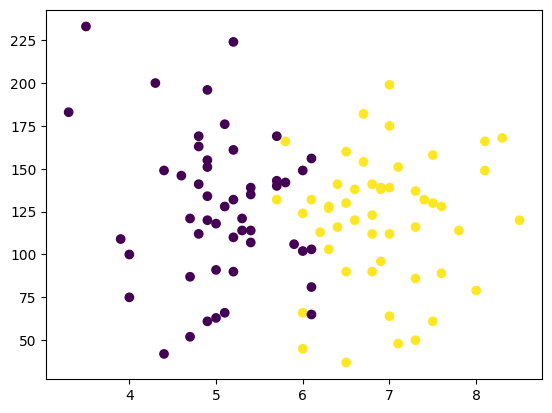

In [18]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

* Scatter plot of CGPA vs IQ, with color (yellow) indicating placement status.
* Decesion is made to use Logistic Regression Algorithm in this data det.

# 1. Extract input and output columns

In [40]:
x = df.iloc[:,0:2]  # Select the first two columns as features
y = df.iloc[:, 2]   # Select the third column as the target variable

In [22]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [23]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


# 2. Train-Test Split

In [24]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [27]:
x_train

,cgpa,iq
60,6.9,139.0
66,6.9,96.0
12,5.4,139.0
36,5.7,140.0
70,6.3,127.0
...,...,...
93,6.8,112.0
92,5.2,110.0
46,5.3,114.0
27,6.0,124.0


In [28]:
x_test

,cgpa,iq
91,7.5,158.0
87,5.7,132.0
79,6.5,90.0
63,6.3,128.0
26,7.0,199.0
77,7.3,50.0
20,6.6,120.0
33,6.0,149.0
53,8.3,168.0
5,7.1,48.0


In [29]:
y_train

,placement
60,1
66,1
12,0
36,0
70,1
...,...
93,1
92,0
46,0
27,1


In [30]:
y_test

,placement
91,1
87,1
79,1
63,1
26,1
77,1
20,1
33,0
53,1
5,1


# 3. Scale the Values

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
x_train = scaler.fit_transform(x_train)

- *`scaler.fit(x_train)`*: Calculates the mean and standard deviation for each feature in the training data (`x_train`).
- *`scaler.transform(x_train)`*: Scales the features by subtracting the mean and dividing by the standard deviation, resulting in a distribution with a mean of 0 and a standard deviation of 1.
- *`fit_transform(x_train)`*: Combines both the `fit` and `transform` steps in one function, applying standardization to `x_train`.

In [35]:
x_train

array([[ 8.81574289e-01,  3.98289551e-01],
       [ 8.81574289e-01, -7.07435386e-01],
       [-4.37855079e-01,  3.98289551e-01],
       [-1.73969206e-01,  4.24004084e-01],
       [ 3.53802542e-01,  8.97151499e-02],
       [ 1.32138408e+00,  2.18287817e-01],
       [ 1.40934604e+00,  1.66858750e-01],
       [-7.01740953e-01,  1.34972729e+00],
       [ 9.69536247e-01, -2.96002851e-01],
       [-1.40543662e+00,  1.96687609e+00],
       [ 5.29726458e-01,  1.66858750e-01],
       [-8.77664869e-01,  2.69716884e-01],
       [-4.37855079e-01, -4.24575518e-01],
       [-8.77664869e-01,  7.06863952e-01],
       [ 8.99166681e-02, -1.47887139e+00],
       [-7.01740953e-01,  1.15429683e-01],
       [-2.28505620e+00,  1.52972902e+00],
       [ 4.41764500e-01, -1.93144718e-01],
       [-1.66932249e+00, -1.24744059e+00],
       [ 5.29726458e-01,  9.38294753e-01],
       [ 1.77878626e-01,  2.18287817e-01],
       [-9.65626827e-01,  1.01543835e+00],
       [ 1.93711778e+00,  6.55434885e-01],
       [-1.

In [36]:
x_test = scaler.transform(x_test)

In [37]:
x_test

array([[ 1.40934604,  0.88686569],
       [-0.17396921,  0.21828782],
       [ 0.52972646, -0.86172259],
       [ 0.35380254,  0.11542968],
       [ 0.96953625,  1.94116156],
       [ 1.23342212, -1.89030392],
       [ 0.61768842, -0.09028658],
       [ 0.08991667,  0.65543489],
       [ 2.1130417 ,  1.14401102],
       [ 1.05749821, -1.94173299]])

# 4. Train the Model

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
clf = LogisticRegression() # creates a object named clf

In [43]:
clf.fit(x_train, y_train)

LogisticRegression()

# 5. Evaluate the Model / Model Selection

In [50]:
y_pred = clf.predict(x_test) # predicts data from x_test dataset
y_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [49]:
y_test

,placement
91,1
87,1
79,1
63,1
26,1
77,1
20,1
33,0
53,1
5,1


In [52]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_score(y_test, y_pred)

0.9

In [55]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

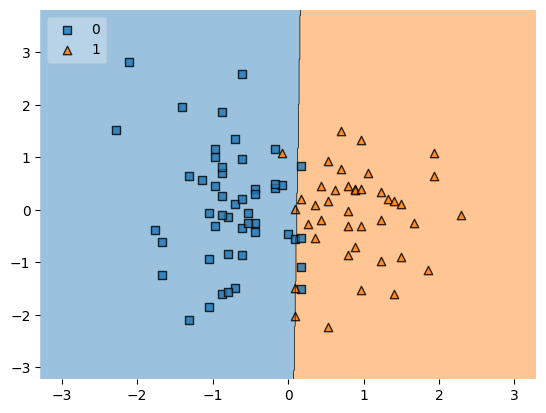

In [58]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

- **`clf=clf`**: In this context, `clf` represents the classifier that has been trained on the data. By passing `clf=clf`, you're providing the trained classifier to the `plot_decision_regions` function so it can plot the decision boundaries based on how `clf` makes predictions on the data.

- **`.values`**: This is used to extract the underlying numpy array from a pandas DataFrame or Series. In this case, `y_train.values` converts the target variable `y_train` (which is a pandas Series) into a numpy array. This is necessary because some functions, including `plot_decision_regions`, require a numpy array as the target data, rather than a pandas Series.

- **`x_train`** is already transformed.

# 6. Deploy the Model
- Heroku
- Google Cloud Platform (GCP)
- Amazon Web Services (AWS)
- Microsoft Azure
- IBM Cloud

In [60]:
import pickle

In [62]:
pickle.dump(clf, open('model.pkl', 'wb'))